In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Electric_Production.csv')



In [5]:
# Convert 'DATA' to DATAtime and set as index
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Check the first few rows
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


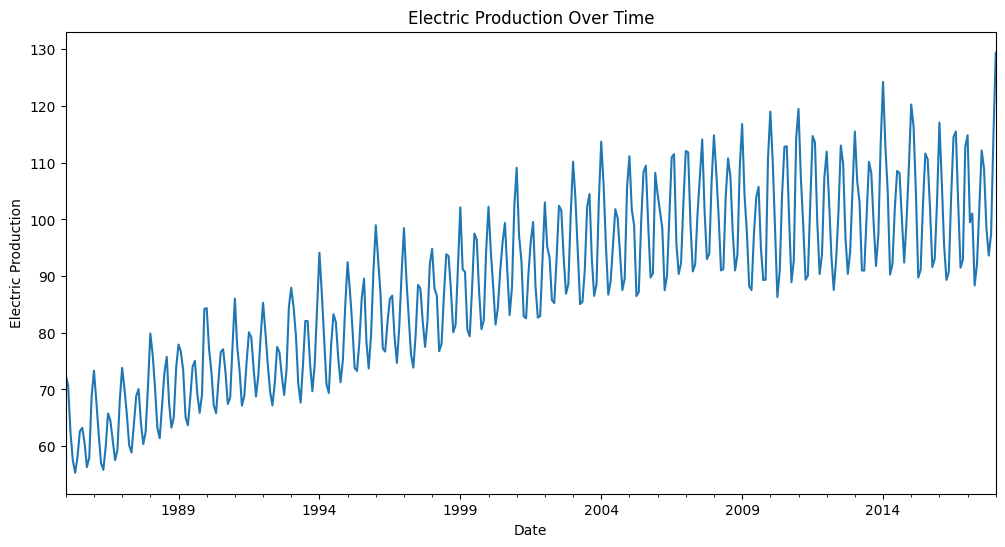

In [8]:
import matplotlib.pyplot as plt

# Plot the data
data['IPG2211A2N'].plot(figsize=(12, 6))
plt.title('Electric Production Over Time')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.show()



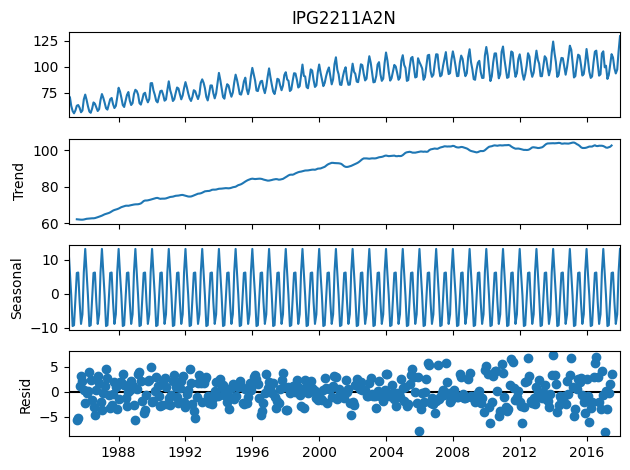

In [9]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['IPG2211A2N'], model='additive', period=12)
decomposition.plot()
plt.show()


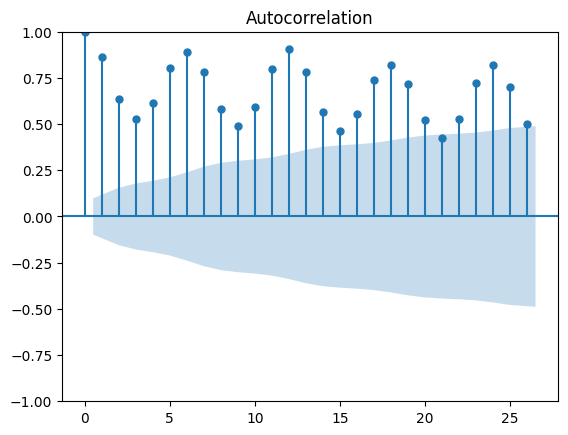

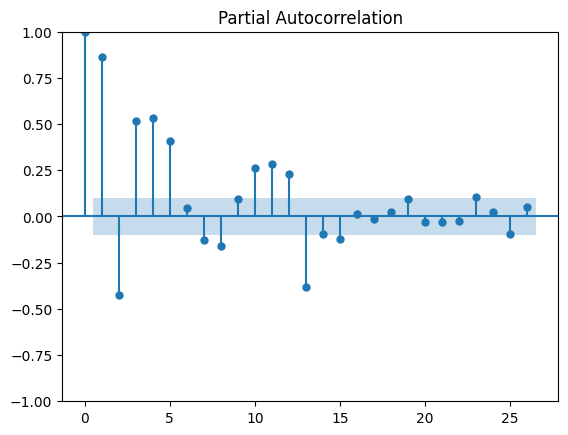

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plot_acf(data['IPG2211A2N'])
plot_pacf(data['IPG2211A2N'])
plt.show()




In [14]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [15]:
# Identify SARIMA parameters
from pmdarima import auto_arima

# Automatically determine the best parameters for the SARIMA model
model = auto_arima(data['IPG2211A2N'], seasonal=True, m=12)
model.summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,2)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  397
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -925.370
Date:                            Fri, 24 May 2024   AIC                           1864.741
Time:                                    13:25:23   BIC                           1892.611
Sample:                                01-01-1985   HQIC                          1875.782
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3482      0.091      3.812      0.000       0.169       0.527
ma.L1         -0.7184      0.090     -7.963      0.000      -0.895      -0.542
ma.L2         -0.2191      0.078     -2.792      0.005      -0.373      -0.065
ar.S.L12       0.9959      0.003    296.034      0.000       0.989       1.003
ma.S.L12      -0.7062      0.044    -16.020      0.000      -0.793      -0.620
ma.S.L24      -0.0606      0.043     -1.409      0.159      -0.145       0.024
sigma2         5.7585      0.335     17.197      0.000       5.102       6.415
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                27.04
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


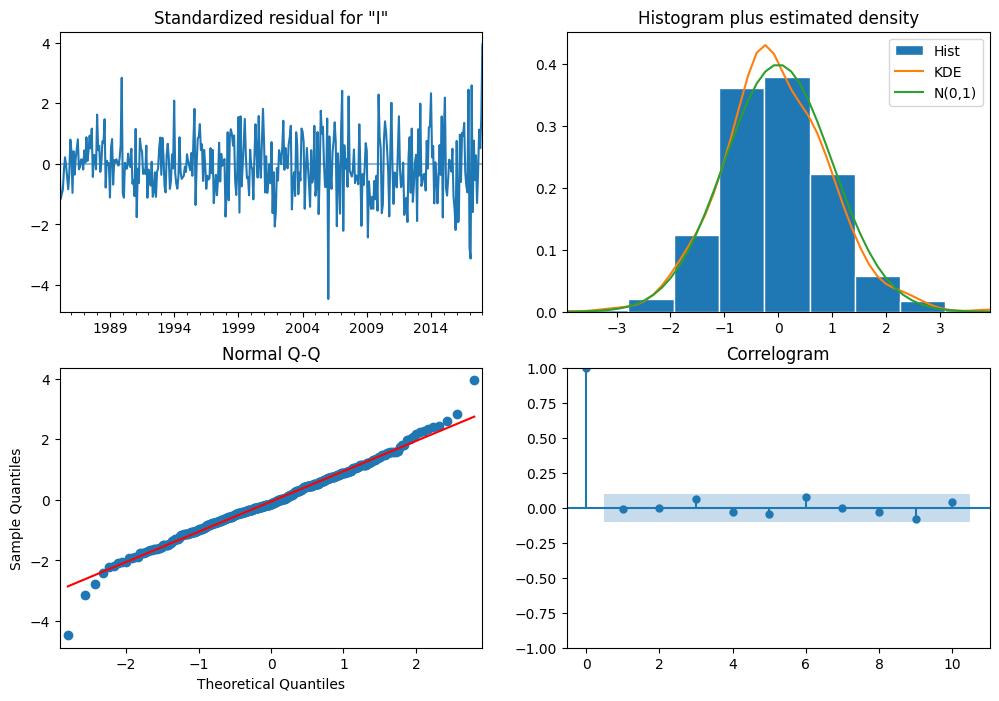

In [16]:
# Fit the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(data['IPG2211A2N'], order=(1,1,2), seasonal_order=(1,0,2,12)).fit()

# Check model diagnostics
sarima_model.plot_diagnostics(figsize=(12, 8))
plt.show()


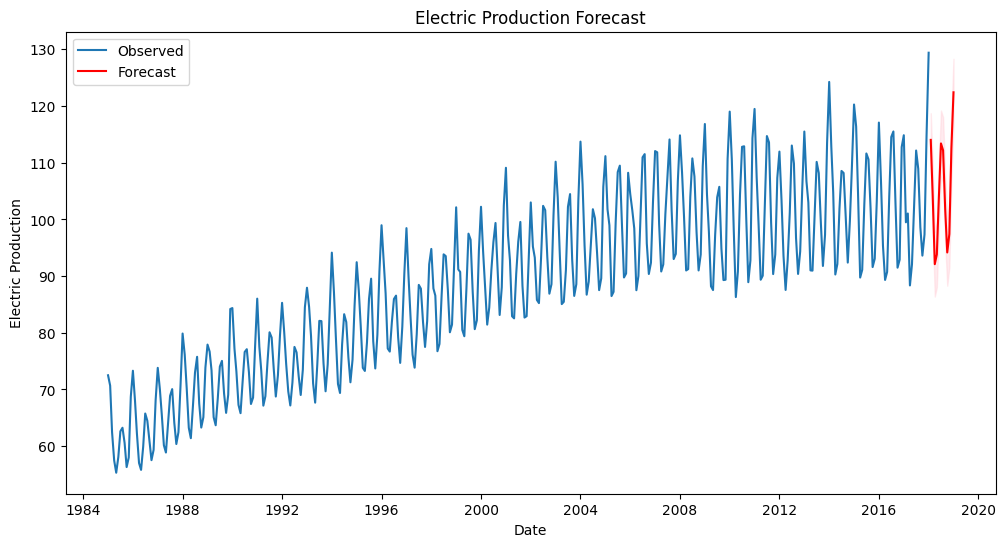

In [17]:
# Forecast the next 12 months
forecast = sarima_model.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['IPG2211A2N'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Electric Production Forecast')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.show()
